## <Span style='color:orange'>**1. Load Data**</SPAN>

In [186]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [187]:
# import display that can display maximum columns and rows
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 200)

In [188]:
# Loading data from clean_data.csv
df = pd.read_csv('clean_data.csv')
df.head()

,race,gender,age,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,glimepiride,glipizide,glyburide,pioglitazone,rosiglitazone,insulin,change,diabetesMed,readmitted,num_total_visits
0,Caucasian,0,15,Discharged to home,Emergency,3,59,0,18,"Endocrine, Nutritional, Metabolic, Immunity",Diabetes,"Endocrine, Nutritional, Metabolic, Immunity",9,None,None,-2,-2,-2,-2,-2,-2,-2,1,1,1,0,0
1,AfricanAmerican,0,25,Discharged to home,Emergency,2,11,5,13,"Pregnancy, Childbirth",Diabetes,External causes of injury,6,None,None,-2,-2,-2,0,-2,-2,-2,-2,0,1,0,3
2,Caucasian,1,35,Discharged to home,Emergency,2,44,1,16,Infectious and Parasitic,Diabetes,Circulatory,7,None,None,-2,-2,-2,-2,-2,-2,-2,1,1,1,0,0
3,Caucasian,1,45,Discharged to home,Emergency,1,51,0,8,Neoplasms,Neoplasms,Diabetes,5,None,None,-2,-2,-2,0,-2,-2,-2,0,1,1,0,0
4,Caucasian,1,55,Discharged to home,Referral,3,31,6,16,Circulatory,Circulatory,Diabetes,9,None,None,-2,-2,-2,-2,-2,-2,-2,0,0,1,0,0


Text(0.5, 1.0, 'Age of Patient VS. Readmission')

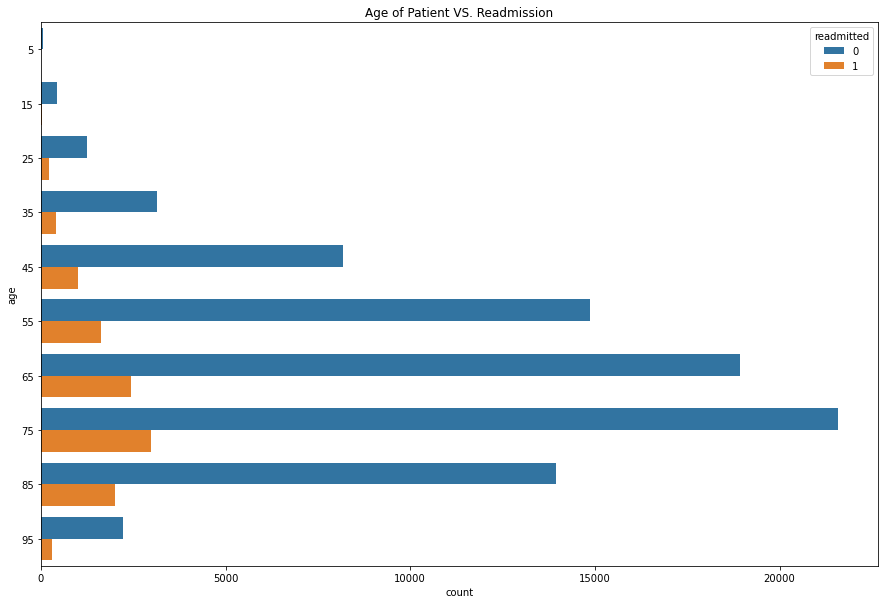

In [189]:
import seaborn as sns
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

In [190]:
from sklearn.preprocessing import LabelEncoder
# LabelEncoding some columns
def label_encoding(df, cols):
    for col in cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        print(df[col].unique())
        

In [191]:
# Assuming you have a DataFrame called 'df' and want to label encode columns 'col1' and 'col2'
cols_to_encode = ['race','admission_source_id', 'discharge_disposition_id',
                    'diag_1', 'diag_2', 'diag_3', 'A1Cresult', 'max_glu_serum']

# Call the label_encoding function
label_encoding(df, cols_to_encode)

# Concatenate the encoded columns to the original DataFrame
df = pd.concat([df, df[cols_to_encode]], axis=1)


[2 0 4 1 3]
[0 2 3 1]
[0 5 1 2 3 4]
[ 5 15  8 12  1  3 16  9 18  6  7 10 11 14  4 13  2  0 17]
[ 3 12  1 16  0  9 11  7  8  5  4 18  6 13 14 10 15  2 17]
[ 5  6  1  3  8 16  9 12  7 14  4 18 10 11  2 13 17 15  0]
[2 0 1 3]
[2 1 3 0]


In [192]:
# Split the concatenated df
from sklearn.model_selection import train_test_split

# Define the target and features label

#Feature
X = df.drop(['readmitted'], axis=1)

#Target
y = df['readmitted']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

# print the shapes of the four datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


from sklearn.preprocessing import StandardScaler
#Standard Scaling
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### <span style='color:cyan'>**1. Dummy Model**</SPAN>

In [193]:
# Dummy model for testing purposes
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# instantiate the model
dummy = DummyClassifier(strategy="most_frequent", random_state=42)

# fit the model

dummy.fit(X_train_scaled, y_train)

# predict the test set result

y_pred = dummy.predict(X_test_scaled)

# evaluate the model

print(f"Accuracy: {dummy.score(X_test_scaled, y_test):.3f}")

# confusion matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

# print the classification report

print(classification_report(y_test, y_pred))


Accuracy: 0.882
[[21102     0]
 [ 2811     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     21102
           1       0.00      0.00      0.00      2811

    accuracy                           0.88     23913
   macro avg       0.44      0.50      0.47     23913
weighted avg       0.78      0.88      0.83     23913



c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [194]:
# Cross_validation

from sklearn.model_selection import cross_val_score
from sympy.abc import y

# initialize the cross_val_score
dummy_cross_val = cross_val_score(dummy, X_train, y_train, cv=3).mean()

#Print the cross_val_score

print("The Cross Validation Score is:", dummy_cross_val)



The Cross Validation Score is: 0.8855434282607787


The dummy model was able to predict 88% accurately and the recall of 100% on  the No readmission and 0% on the readmission. This is because of the class imbalance. We will go ahead and to oversampling to deal with class imbalance. 

In [195]:
# Dummy Model with oversampling to clear class imbalance

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE 

#instantiate oversampled model
from imblearn.over_sampling import SMOTE
from collections import Counter

#instantiate oversampled model
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X_train_scaled, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))


Original dataset shape Counter({0: 63528, 1: 8211})
New dataset shape Counter({0: 63528, 1: 63528})


In [196]:
#instantiate oversampled model
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
test_input_new, test_output_new = sm.fit_sample(X_test_scaled, y_test)
print('New dataset shape {}'.format(Counter(test_output_new)))

Original dataset shape Counter({0: 63528, 1: 8211})
New dataset shape Counter({0: 21102, 1: 21102})


In [197]:
# instantiate the model
dummy_over = DummyClassifier(strategy="most_frequent", random_state=42)

# fit the model

dummy_over.fit(train_input_new, train_output_new)

# predict the test set result

y_pred = dummy_over.predict(X_test_scaled)

# evaluate the model

print(f"Accuracy: {dummy_over.score(X_test_scaled, y_test):.3f}")

# confusion matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

# print the classification report

print(classification_report(y_test, y_pred))

Accuracy: 0.882
[[21102     0]
 [ 2811     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     21102
           1       0.00      0.00      0.00      2811

    accuracy                           0.88     23913
   macro avg       0.44      0.50      0.47     23913
weighted avg       0.78      0.88      0.83     23913



c:\Users\hp\anaconda3\envs\learn-env\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [198]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train_scaled, y_train)

y_pred = logit.predict(X_test_scaled)

#print recall and precision

from sklearn.metrics import recall_score, precision_score

print('Recall: ', recall_score(y_test, y_pred))

print('Precision: ', precision_score(y_test, y_pred))

cross_val_score(logit, X_train_scaled, y_train, cv=5)


Recall:  0.004624688722874422
Precision:  0.22807017543859648


array([0.88534987, 0.88423474, 0.88500139, 0.88437413, 0.88457517])

In [199]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, y_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, y_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, y_pred)))

Accuracy is 0.88
Precision is 0.23
Recall is 0.00


In [200]:
logit_pred = logit.predict(X_test_scaled)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,5216,10,5226
1,703,1,704
All,5919,11,5930


In [201]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

Accuracy is 0.88
Precision is 0.23
Recall is 0.00


In [202]:
from imblearn.over_sampling import SMOTE
from collections import Counter
print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=20)
train_input_new, train_output_new = sm.fit_sample(X_train_scaled, y_train)
print('New dataset shape {}'.format(Counter(train_output_new)))

Original dataset shape Counter({0: 63528, 1: 8211})
New dataset shape Counter({0: 63528, 1: 63528})


In [203]:
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.25, random_state=42)

logit = LogisticRegression(fit_intercept=True, penalty='l2')
logit.fit(X_train_scaled, y_train)

cross_val_score(logit, X_train_scaled, y_train, cv=5)


array([0.60375676, 0.60333701, 0.60588729, 0.60064015, 0.60284395])

In [204]:
logit_pred = logit.predict(X_test_scaled)
pd.crosstab(pd.Series(y_test, name = 'Actual'), pd.Series(logit_pred, name = 'Predict'), margins = True)

Predict,0,1,All
Actual,,,
0,3857,3263,7120
1,477,395,872
All,4334,3658,7992


In [205]:
print("Accuracy is {0:.2f}".format(accuracy_score(y_test, logit_pred)))
print("Precision is {0:.2f}".format(precision_score(y_test, logit_pred)))
print("Recall is {0:.2f}".format(recall_score(y_test, logit_pred)))

accuracy_logit = accuracy_score(y_test, logit_pred)
precision_logit = precision_score(y_test, logit_pred)
recall_logit = recall_score(y_test, logit_pred)

Accuracy is 0.61
Precision is 0.61
Recall is 0.56


In [206]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

def multiclass_eval(y_true, y_pred, X_test, X_train, clf, n_class=2):
    print(f"Training score: {clf.score(X_train, y_train)}\nTest Score: {clf.score(X_test, y_test)}")
    
    # Print classification report
    print('\n')
    print('Classification Report')
    print('_____________')
    print(classification_report(y_true=y_true, y_pred=y_pred))
    
    # Create a figure/axes for confusion matrix and ROC curve
    fig, ax = plt.subplots(ncols=2, figsize=(12, 5))
    
    # Plot the normalized confusion matrix
    plot_confusion_matrix(estimator=clf, X=X_test, y_true=y_true, cmap='BrBG_r', 
                          normalize='true', ax=ax[0], 
                          display_labels=['0', '1'])
    
    pred_prob = clf.predict_proba(X_test)
    
    # Plot the ROC curve
    fpr = {}
    tpr = {}
    thresh = {}
    
    for i in range(n_class):
        fpr[i], tpr[i], thresh[i] = roc_curve(y_true, pred_prob[:, i], pos_label=i)
    
    ax[1].plot(fpr[0], tpr[0], linestyle='--', color='red', label='0')
    ax[1].plot(fpr[1], tpr[1], linestyle='--', color='black', label='1')
    
    ax[1].set_title('Multiclass ROC curve')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive rate')
    ax[1].legend(loc='best')
    ax[1].plot([0, 1], [0, 1], ls='--', color='cyan')

Training score: 0.6033664945640768
Test Score: 0.6059060571716408


Classification Report
_____________
              precision    recall  f1-score   support

           0       0.60      0.65      0.63     16009
           1       0.61      0.56      0.58     15755

    accuracy                           0.61     31764
   macro avg       0.61      0.61      0.60     31764
weighted avg       0.61      0.61      0.61     31764



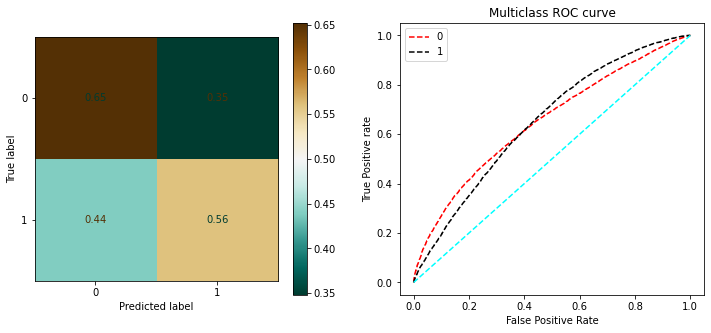

In [207]:
# Creating a pipeline baseline Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Create the pipeline: pipeline
lr_pipe = Pipeline([('Scaler', StandardScaler()), 
                    ('clf', LogisticRegression(class_weight='balanced', random_state=42))
                    ])

# Fit the model
lr_pipe.fit(X_train_scaled, y_train)

# Predict the labels of the test set: y_pred

y_pred = lr_pipe.predict(X_test_scaled)

# Evaluate the model and make confusion matrix
multiclass_eval(y_test, y_pred, X_test_scaled, X_train_scaled, lr_pipe)


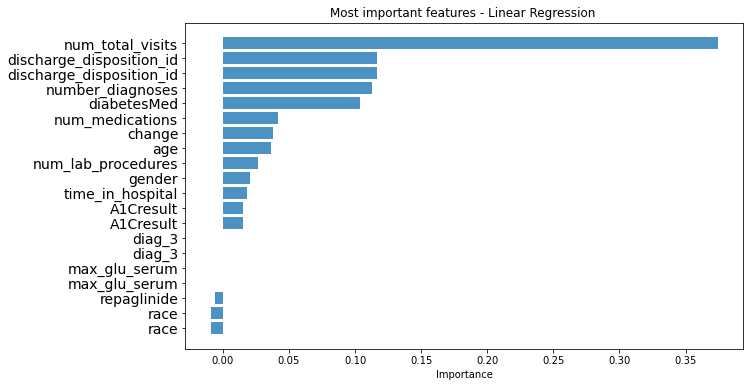

In [208]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = lr_pipe.named_steps['clf'].coef_[0]
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

# Plot the most important features
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Linear Regression ')
plt.show()

Random Forest


Training score: 0.9999790118792763
Test Score: 0.9359967258531671


Classification Report
_____________
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     16009
           1       1.00      0.88      0.93     15755

    accuracy                           0.94     31764
   macro avg       0.94      0.94      0.94     31764
weighted avg       0.94      0.94      0.94     31764



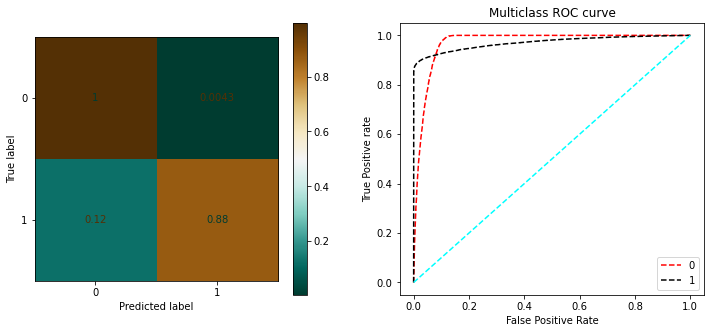

In [209]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline

# Create a Pipeline
rf_model_final = Pipeline([('scaler', StandardScaler()),
                           ('rf', RandomForestClassifier(criterion='entropy', max_depth=31, 
                                                        max_features='auto', random_state=42))
                          ])

# Fit the model
rf_model_final.fit(X_train_scaled, y_train)

# Predict
y_pred = rf_model_final.predict(X_test_scaled)

# Evaluate the model and make confusion matrix
multiclass_eval(y_test, y_pred, X_test_scaled, X_train_scaled, rf_model_final)

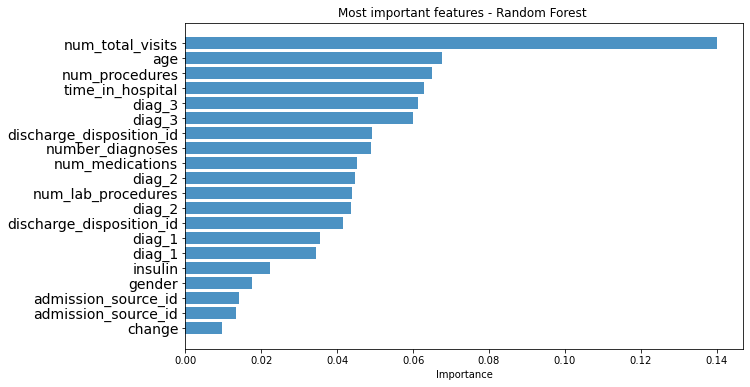

In [210]:
# Create list of top most features based on importance
feature_names = X_train.columns
# Assuming the random forest estimator is named 'rf' within the pipeline
feature_imports = rf_model_final.named_steps['rf'].feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

# Plot the most important features
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

Decision Tree

Training score: 0.9899047139319145
Test Score: 0.8632414053645636


Classification Report
_____________
              precision    recall  f1-score   support

           0       0.87      0.86      0.86     16009
           1       0.86      0.87      0.86     15755

    accuracy                           0.86     31764
   macro avg       0.86      0.86      0.86     31764
weighted avg       0.86      0.86      0.86     31764



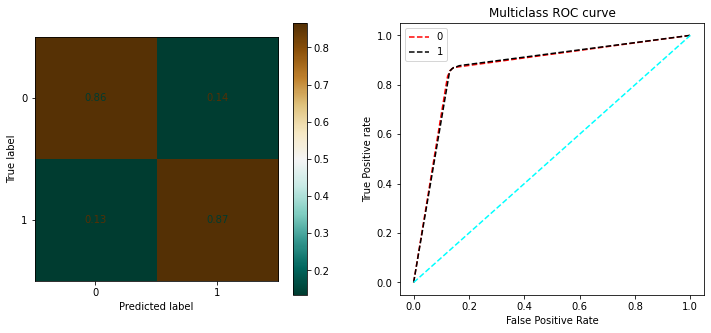

In [211]:

from sklearn.tree import DecisionTreeClassifier
# Create a Pipeline
dt_model_final = Pipeline([('scaler', StandardScaler()),
                           ('dt', DecisionTreeClassifier(criterion='entropy', max_depth=31, 
                                                        max_features='auto', random_state=42))
                          ])

# Fit the model
dt_model_final.fit(X_train_scaled, y_train)

# Predict
y_pred = dt_model_final.predict(X_test_scaled)

# Evaluate the model and make confusion matrix
multiclass_eval(y_test, y_pred, X_test_scaled, X_train_scaled, dt_model_final)

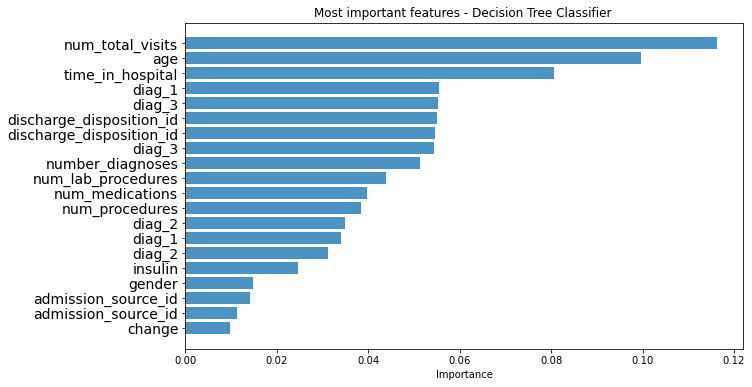

In [212]:
# Create list of top most features based on importance
feature_names = X_train.columns
# Assuming the random forest estimator is named 'rf' within the pipeline
feature_imports = dt_model_final.named_steps['dt'].feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

# Plot the most important features
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree Classifier ')
plt.show()

Training score: 0.9383683834949419
Test Score: 0.9339503840826092


Classification Report
_____________
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     16009
           1       1.00      0.87      0.93     15755

    accuracy                           0.93     31764
   macro avg       0.94      0.93      0.93     31764
weighted avg       0.94      0.93      0.93     31764



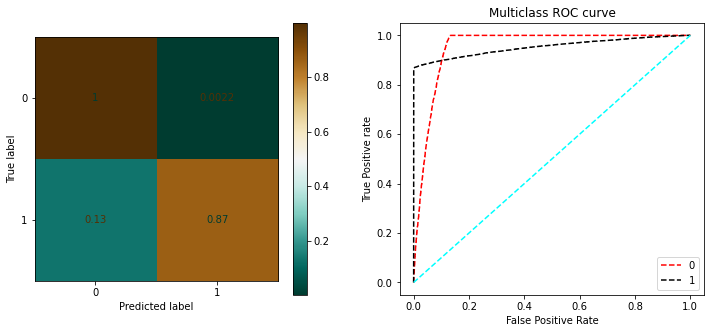

In [213]:
# Create a Pipeline
from xgboost import XGBClassifier
import xgboost
xgb_model = Pipeline([('scaler', StandardScaler()),
                           ('xgb', xgboost.XGBClassifier( random_state=42))
                          ])

# Fit the model
xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate the model and make confusion matrix
multiclass_eval(y_test, y_pred, X_test_scaled, X_train_scaled, xgb_model)

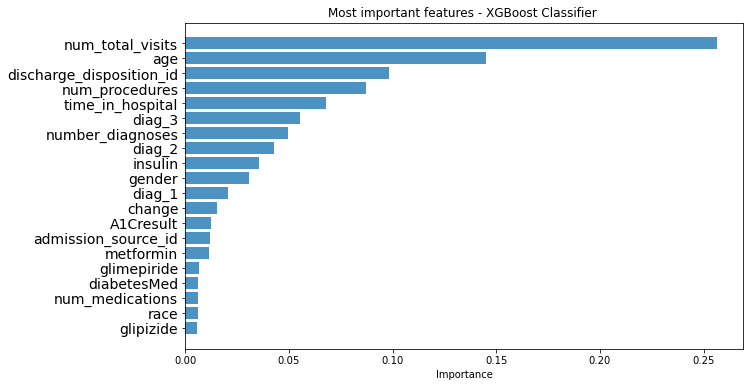

In [214]:
# Create list of top most features based on importance
feature_names = X_train.columns
# Assuming the random forest estimator is named 'rf' within the pipeline
feature_imports = xgb_model.named_steps['xgb'].feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(20, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)

# Plot the most important features
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - XGBoost Classifier ')
plt.show()

In [ ]:
#df_results = df_results.append({"Model": 'LogReg',
                                #"accuracy" :acc_score_lr,
                                #"Precision":prec_score_lr,
                                #"Recall":rec_score_lr,
                                #"F1 Score": f1_score_lr,
                                #"Cross_val_score":cross_val_lr
                              #}, ignore_index=True)

#df_results